In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [3]:
# Load the dataset
file_path = '/content/KC_BL_DATASET.csv'
df = pd.read_csv(file_path)


In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
           id             date   price  bedrooms  bathrooms  sqft_living  \
0  5652600427  20150224T000000  420000         4       2.00         1700   
1  7888000390  20140627T000000  140000         3       1.00         1060   
2  5318101695  20150409T000000  940000         4       1.50         2430   
3  4039000050  20140714T000000  516130         3       1.75         1510   
4  7853230590  20141029T000000  435000         4       2.50         2190   

   sqft_lot  sqft_above  sqft_basement  yr_built  ...    Genre_2    Genre_3  \
0      6375         850            850      1950  ...  Adventure      Drama   
1      7473        1060              0      1959  ...  Adventure     Sci-Fi   
2      3600        2430              0      1980  ...     Action  Adventure   
3      8250        1510              0      1962  ...  Adventure      Drama   
4      6578        2190              0      2004  ...     Comedy        NaN   

  imdb_rating length  rank_in_year  r

In [5]:
# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(df.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               437 non-null    int64  
 1   date             437 non-null    object 
 2   price            437 non-null    int64  
 3   bedrooms         437 non-null    int64  
 4   bathrooms        437 non-null    float64
 5   sqft_living      437 non-null    int64  
 6   sqft_lot         437 non-null    int64  
 7   sqft_above       437 non-null    int64  
 8   sqft_basement    437 non-null    int64  
 9   yr_built         437 non-null    int64  
 10  yr_renovated     437 non-null    int64  
 11  Main_Genre       437 non-null    object 
 12  Genre_2          408 non-null    object 
 13  Genre_3          296 non-null    object 
 14  imdb_rating      437 non-null    float64
 15  length           437 non-null    int64  
 16  rank_in_year     437 non

In [6]:
# Display summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))


Summary statistics:
                  id             date         price    bedrooms   bathrooms  \
count   4.370000e+02              437  4.370000e+02  437.000000  437.000000   
unique           NaN              214           NaN         NaN         NaN   
top              NaN  20150327T000000           NaN         NaN         NaN   
freq             NaN                7           NaN         NaN         NaN   
mean    4.695092e+09              NaN  5.233471e+05    3.423341    2.132723   
std     2.834411e+09              NaN  3.439340e+05    0.951438    0.740849   
min     4.610035e+07              NaN  1.000000e+05    0.000000    0.000000   
25%     2.220069e+09              NaN  3.050000e+05    3.000000    1.750000   
50%     4.038701e+09              NaN  4.350000e+05    3.000000    2.250000   
75%     7.518503e+09              NaN  6.300000e+05    4.000000    2.500000   
max     9.834201e+09              NaN  2.900000e+06    8.000000    4.750000   

        sqft_living      sqft_

In [7]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())



Missing values in the dataset:
id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
Main_Genre           0
Genre_2             29
Genre_3            141
imdb_rating          0
length               0
rank_in_year         0
rating               0
studio               0
title                0
worldwide_gross      0
year                 0
dtype: int64


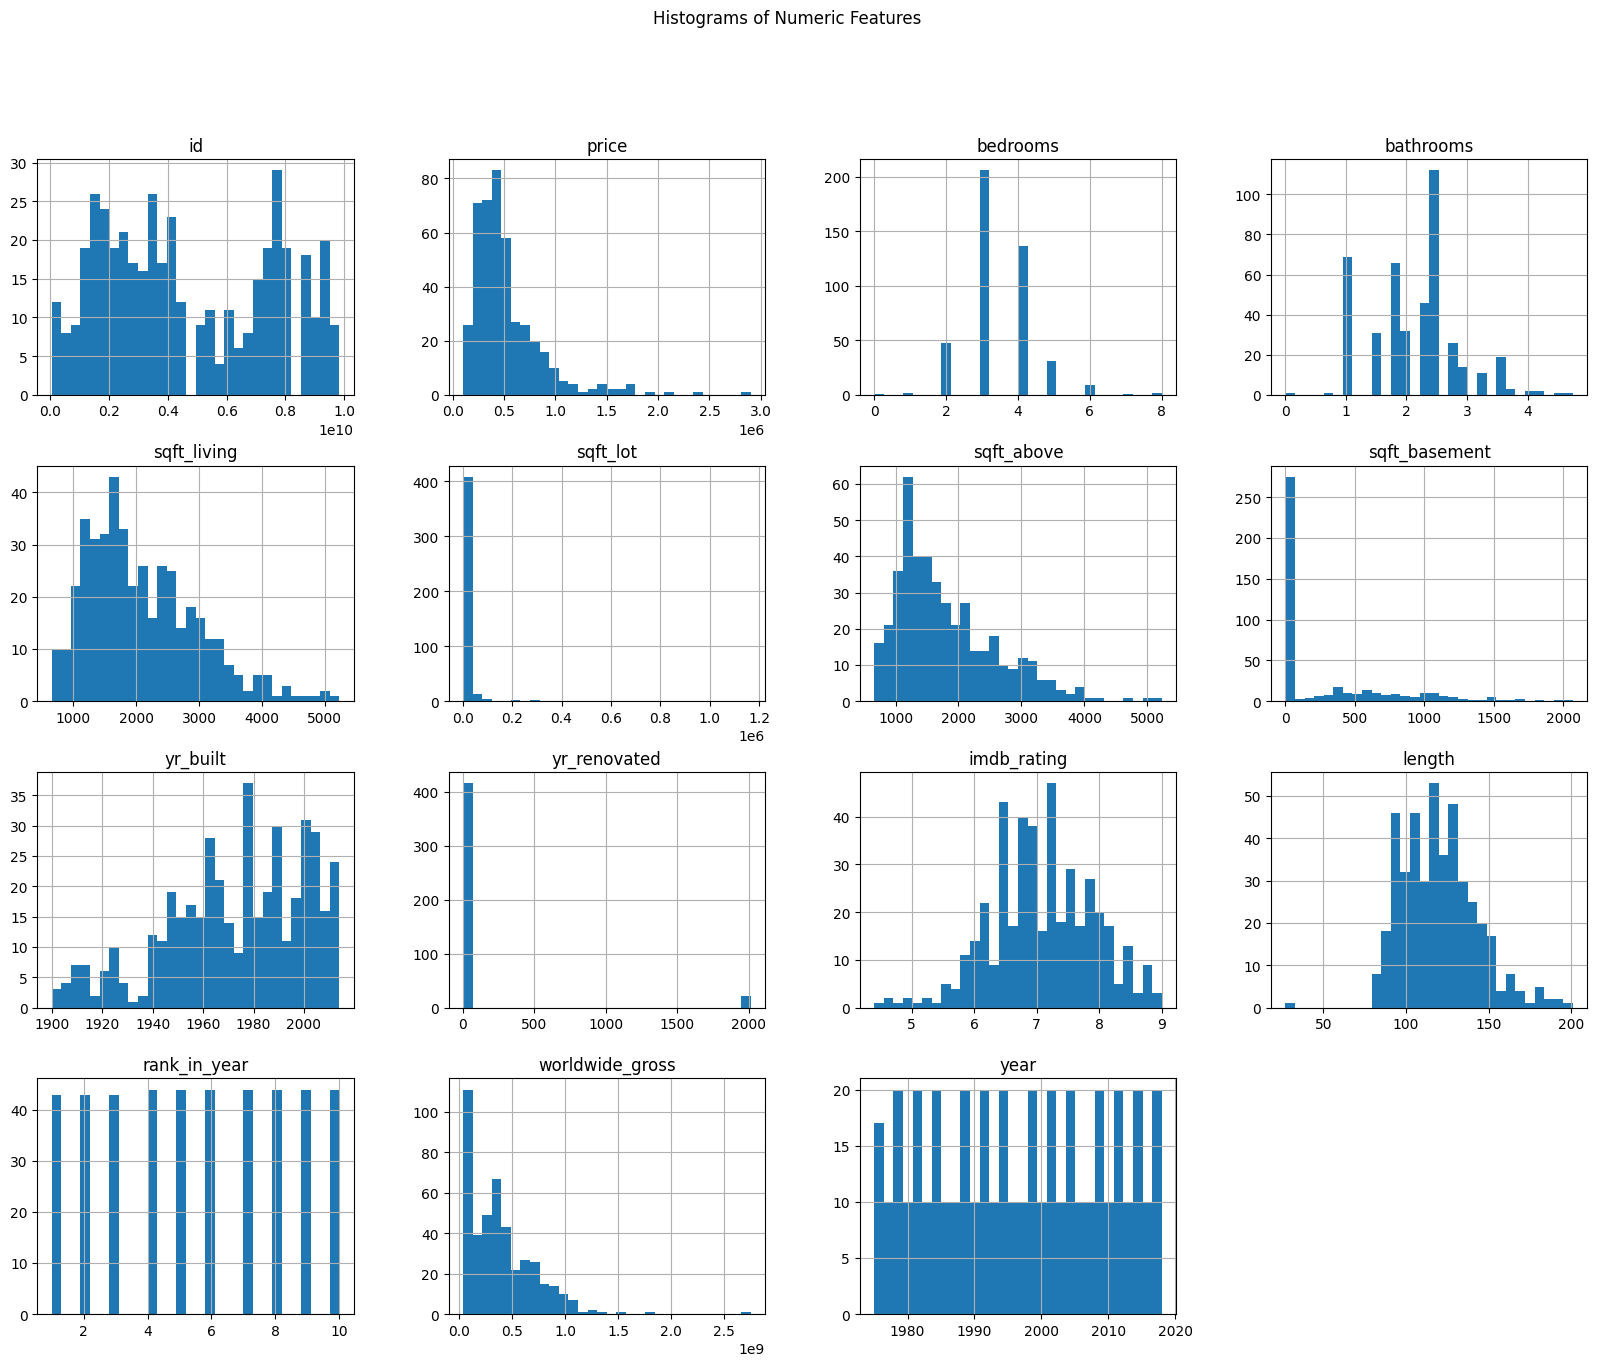

In [8]:
# Data visualization
# Histograms for numeric features
df.hist(bins=30, figsize=(20, 15))
plt.suptitle("Histograms of Numeric Features")
plt.show()

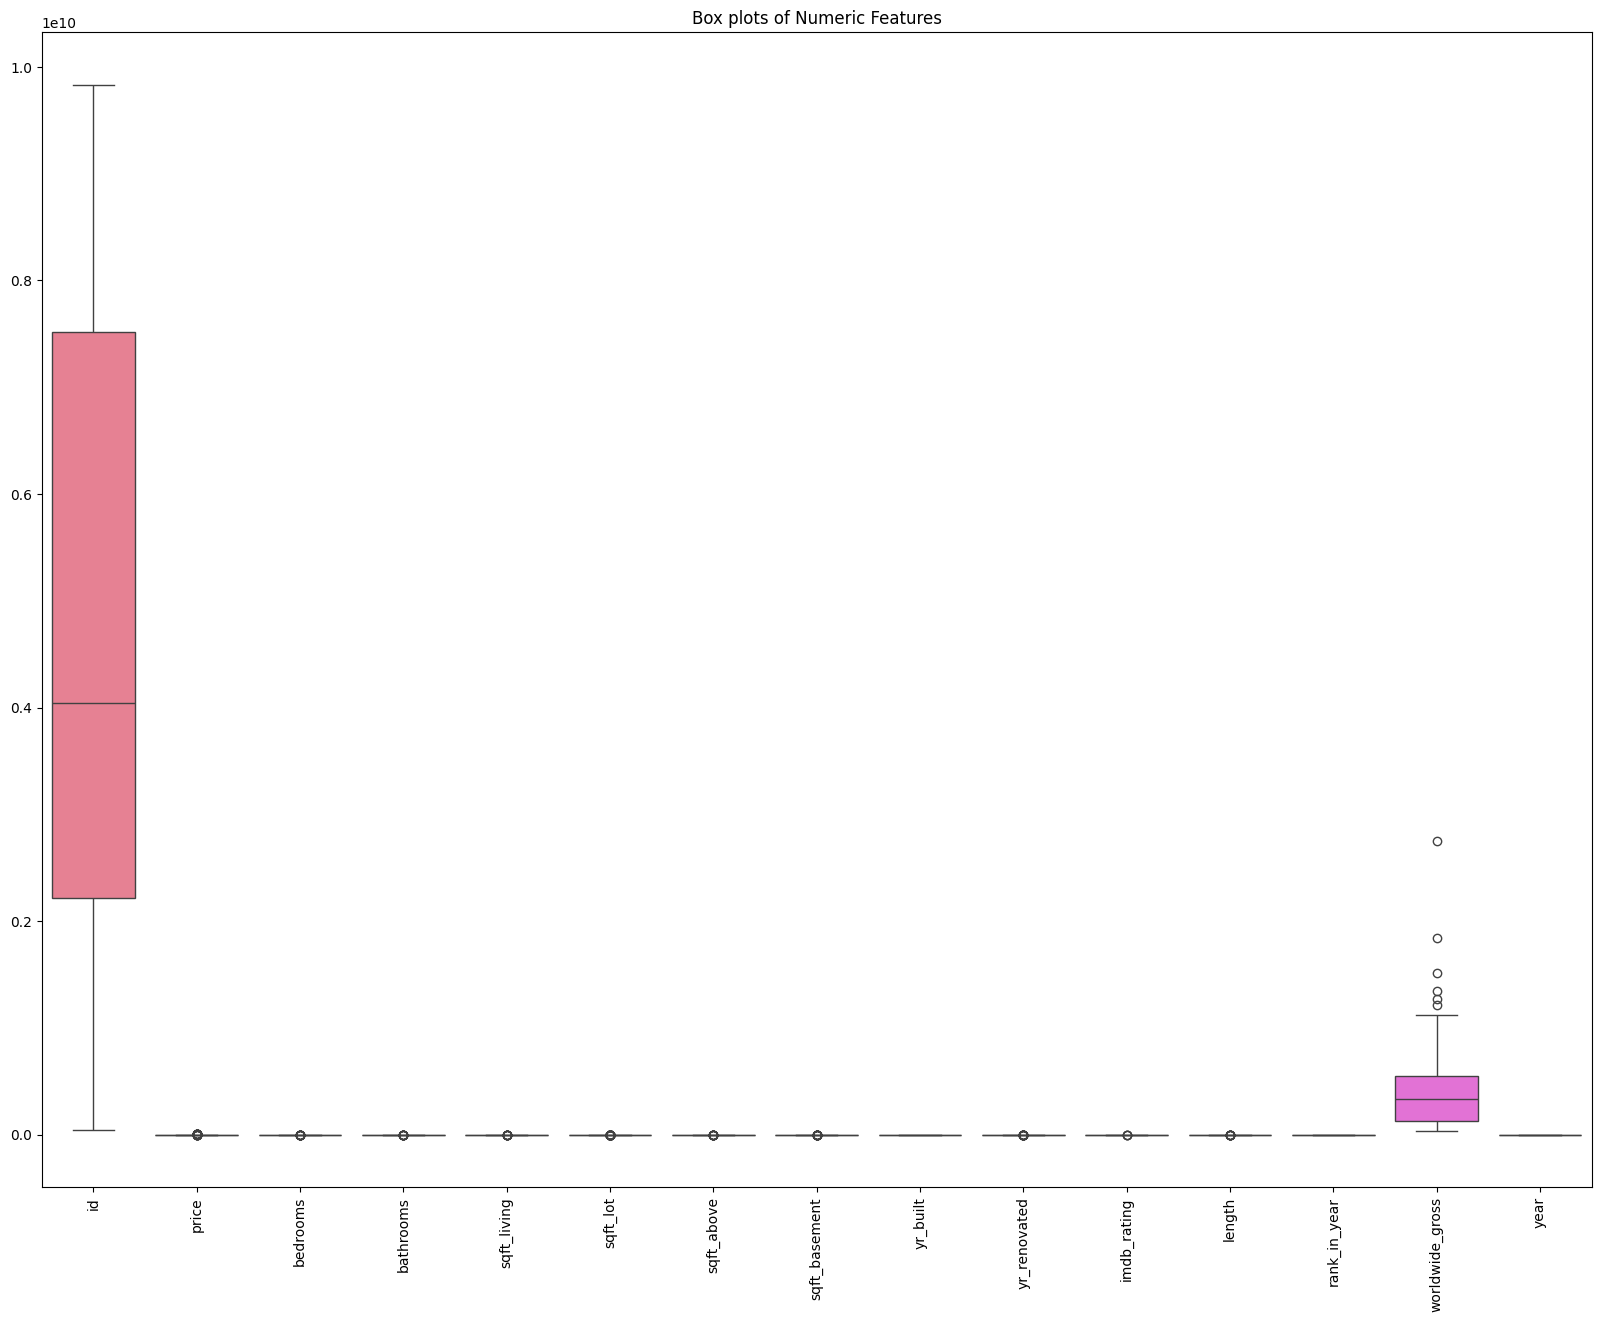

In [9]:
# Box plots for numeric features
plt.figure(figsize=(20, 15))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Box plots of Numeric Features")
plt.xticks(rotation=90)
plt.show()

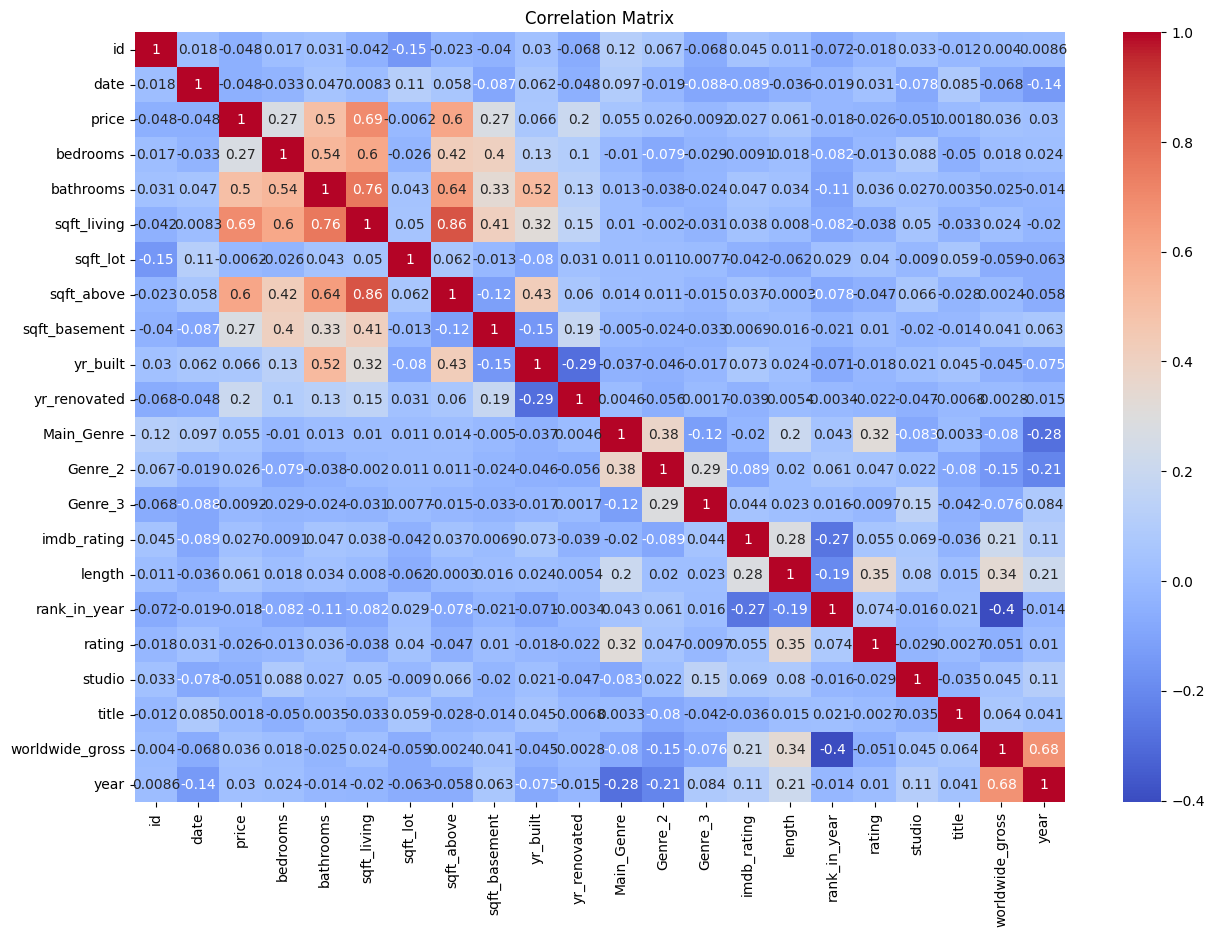

In [19]:
# Correlation matrix (only numeric columns)
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


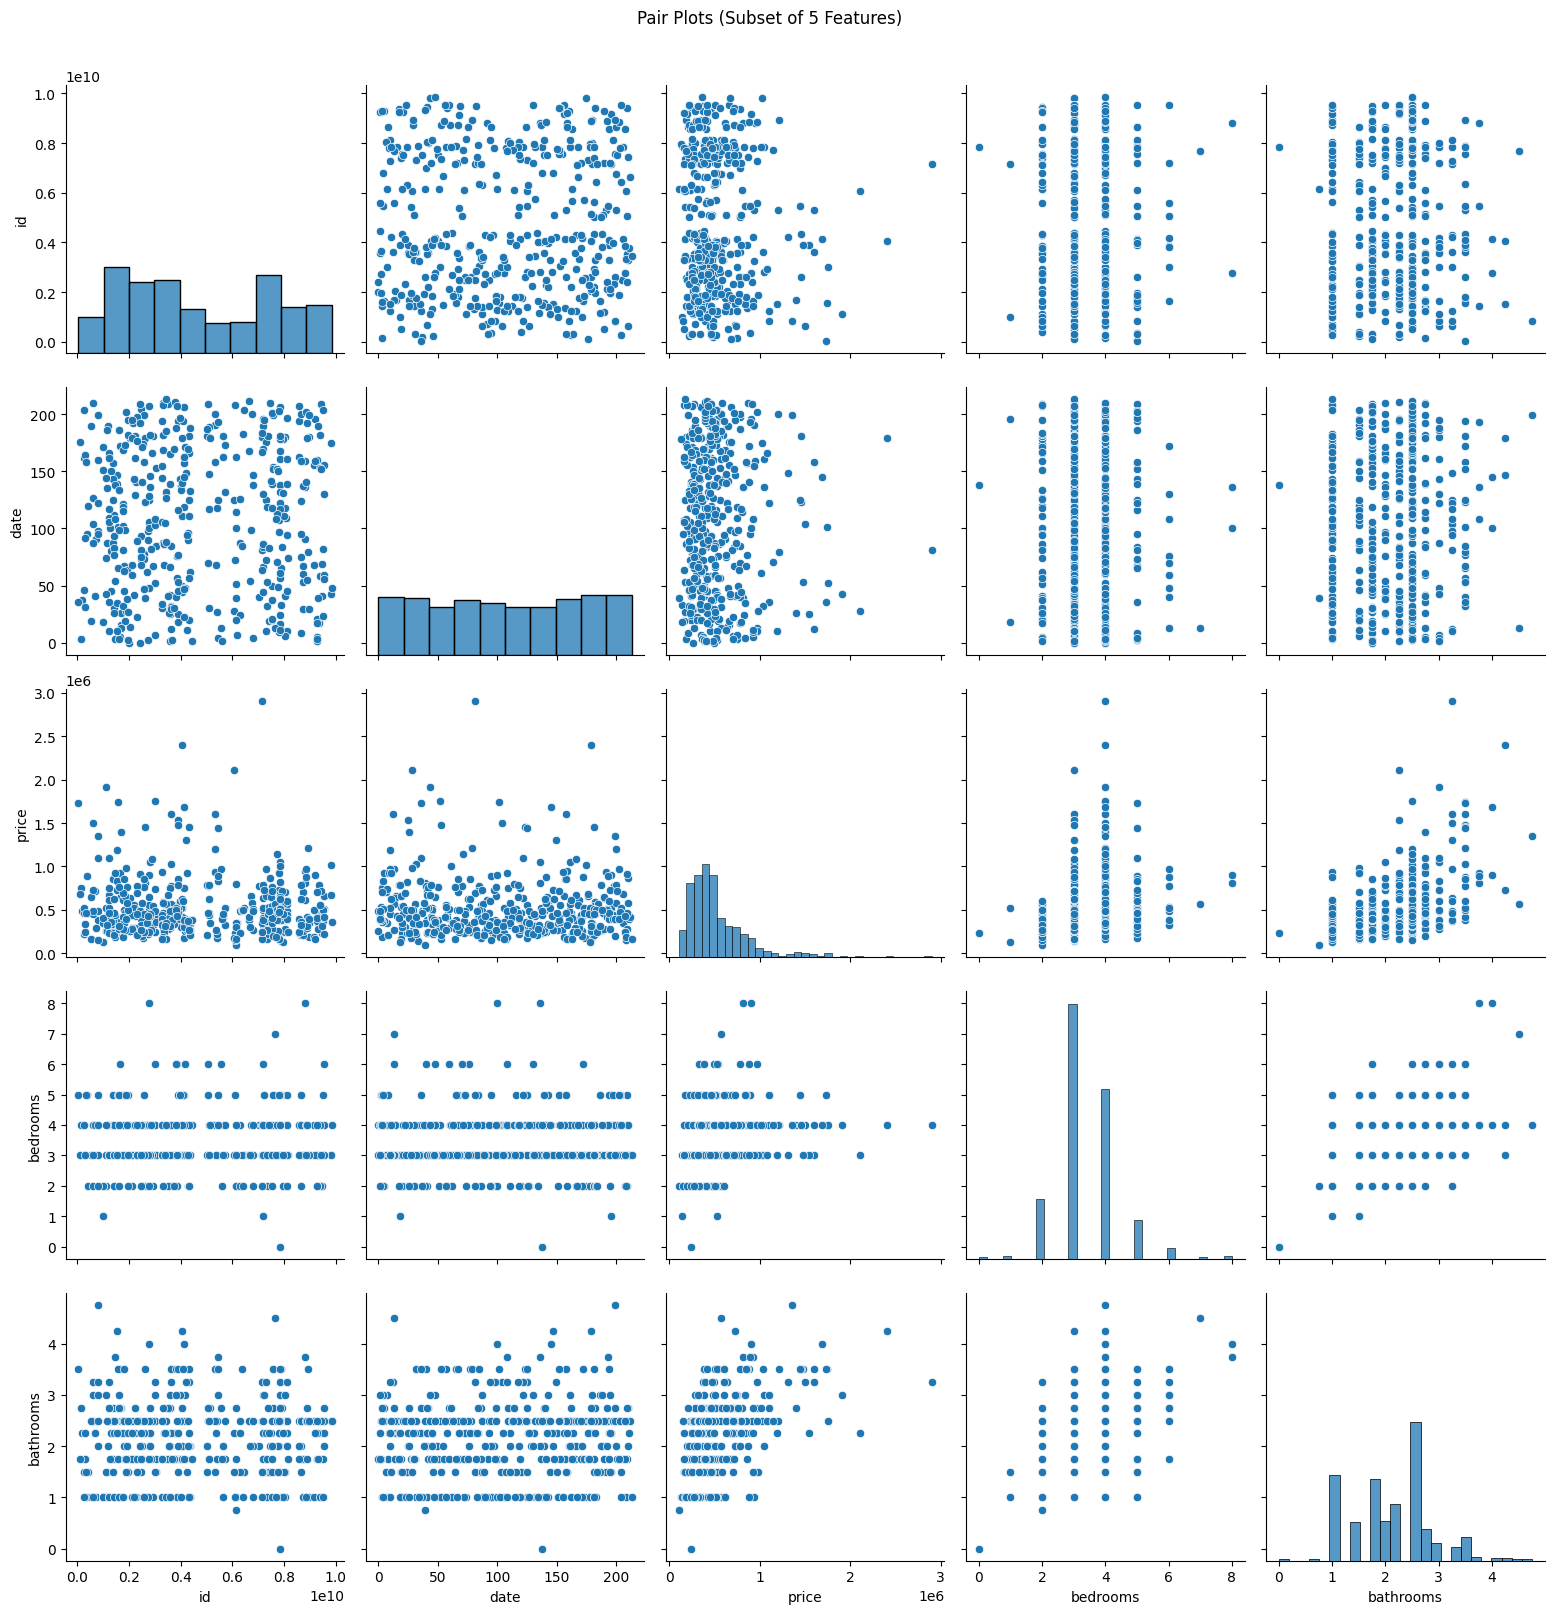

In [27]:
# Pair plots for a subset of 10 numeric features
subset_numeric_df = numeric_df.iloc[:, :5]
g = sns.pairplot(subset_numeric_df)
g.fig.set_size_inches(16,16)
g.fig.suptitle("Pair Plots (Subset of 5 Features)", y=1.02)
plt.show()


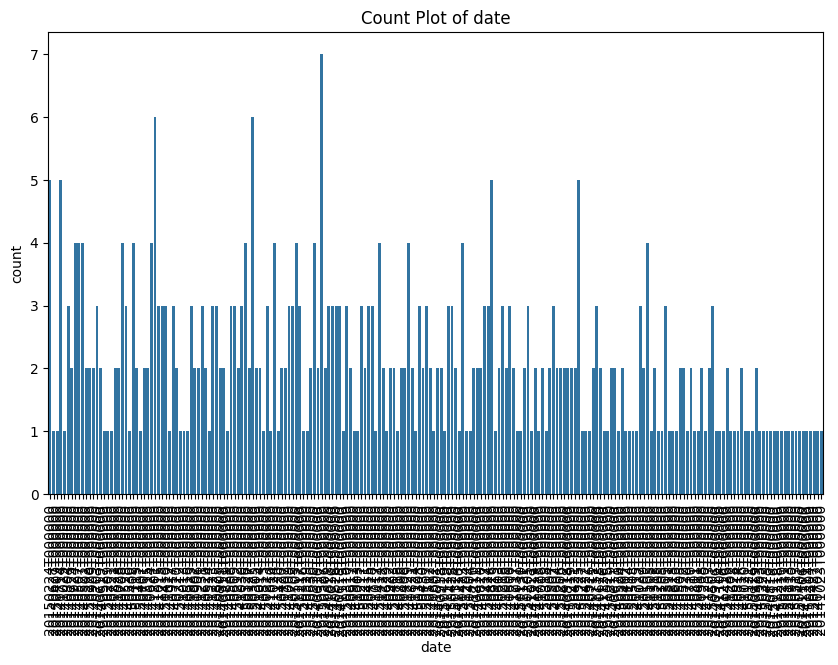

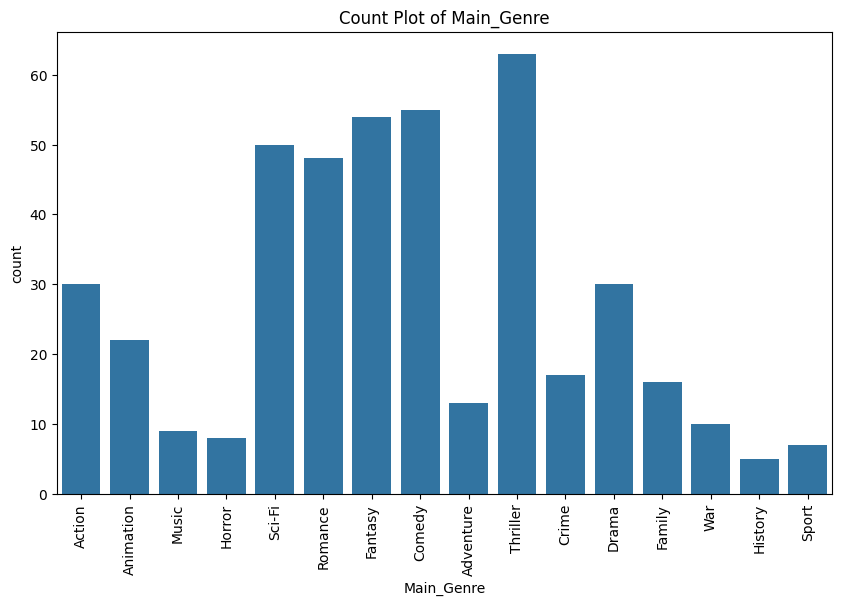

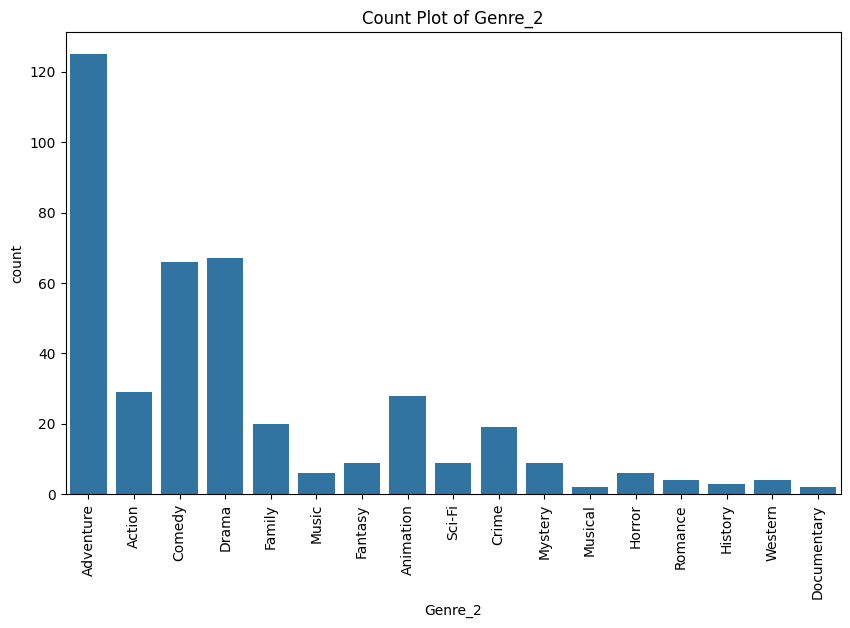

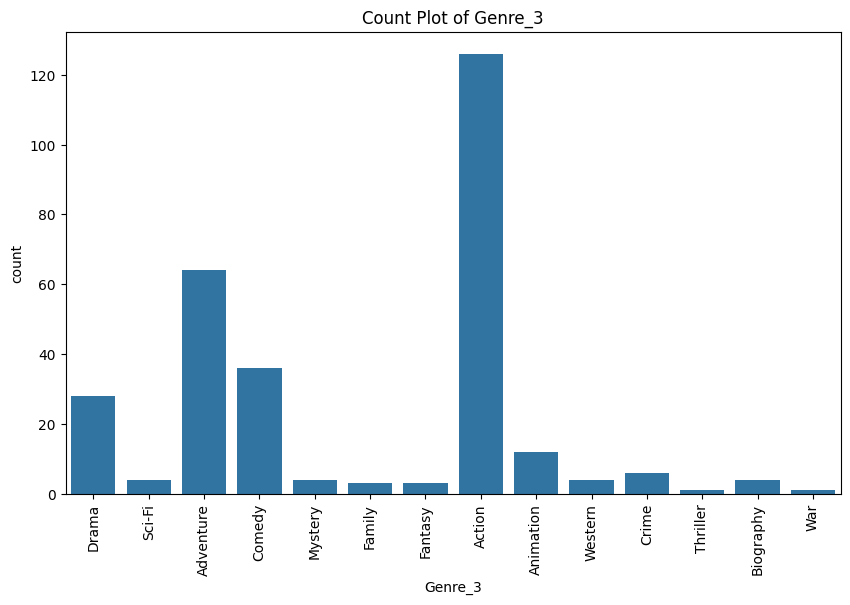

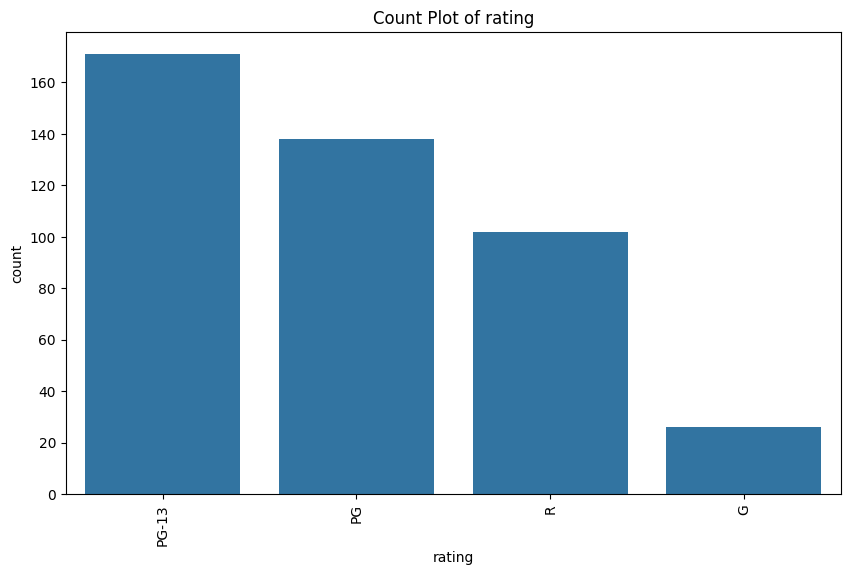

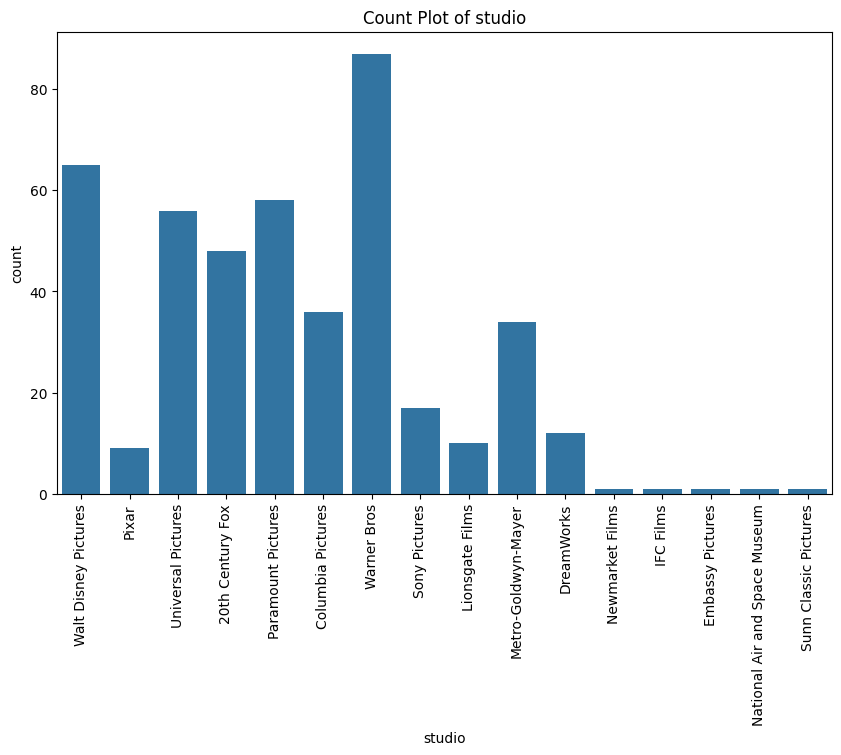

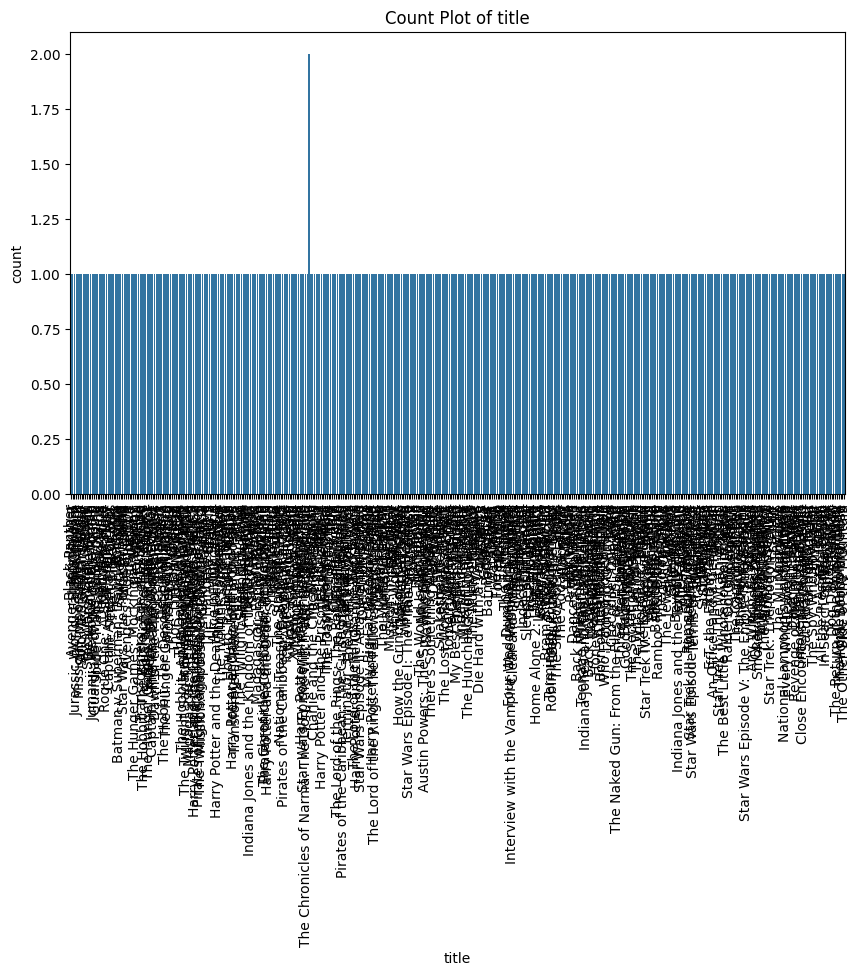

In [12]:
# Count plots for categorical features
categorical_features = df.select_dtypes(include=[object]).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f"Count Plot of {feature}")
    plt.xticks(rotation=90)
    plt.show()

In [13]:
# Handling missing values (if any)
# Fill missing values with mean for numeric features
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].mean(), inplace=True)


In [14]:
# Fill missing values with mode for categorical features
for column in categorical_features:
    df[column].fillna(df[column].mode()[0], inplace=True)


In [15]:
# Encoding categorical features
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [16]:
# Verify no missing values remain
print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values after handling:
id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
Main_Genre         0
Genre_2            0
Genre_3            0
imdb_rating        0
length             0
rank_in_year       0
rating             0
studio             0
title              0
worldwide_gross    0
year               0
dtype: int64


In [18]:
# Save the cleaned dataset
cleaned_file_path = '/content/KC_BL_DATASET CLEANED.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"\nCleaned dataset saved to: {cleaned_file_path}")


Cleaned dataset saved to: /content/KC_BL_DATASET CLEANED.csv
